In [120]:
import numpy as np
import torch
import matplotlib.pyplot as plt
print(torch.__version__)

0.4.1


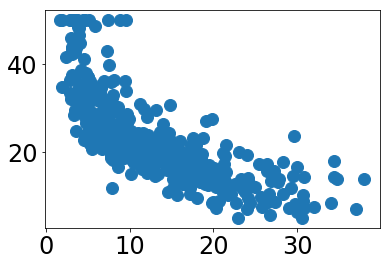

In [121]:
from sklearn.datasets import load_boston
boston = load_boston()
plt.scatter(boston.data[:, -1], boston.target)

In [122]:
from torch.autograd import Variable
w = torch.zeros(boston.data.shape[1], requires_grad=True)
b = torch.zeros(1, requires_grad=True)

x = torch.tensor(boston.data/np.mean(boston.data, axis=0), dtype=torch.float32)
y = torch.tensor(boston.target, dtype=torch.float32)

In [123]:
iters = 100
losses = np.zeros(iters)

for i in range(iters):

    y_pred = torch.matmul(x, w) + b
    loss = torch.mean( (y_pred - y)**2 )
    loss.backward()
    losses[i] = loss.item()

    w.data -= 0.05 * w.grad.data
    b.data -= 0.05 * b.grad.data
    
    #zero gradients
    w.grad.data.zero_()
    b.grad.data.zero_()

In [124]:
w = torch.zeros(boston.data.shape[1], requires_grad=True)
b = torch.zeros(1, requires_grad=True)

noise = np.random.normal(loc=0.0, scale=0.8, size=boston.data.shape)

x = torch.tensor(boston.data/np.mean(boston.data, axis=0)+noise, dtype=torch.float32)
y = torch.tensor(boston.target, dtype=torch.float32)

In [125]:
losses_noisy_1 = np.zeros(iters)

for i in range(iters):

    y_pred = torch.matmul(x, w) + b
    loss = torch.mean( (y_pred - y)**2 )
    loss.backward()
    losses_noisy_1[i] = loss.item()
    w.data -= 0.05 * w.grad.data
    b.data -= 0.05 * b.grad.data
    
    #zero gradients
    w.grad.data.zero_()
    b.grad.data.zero_()

In [126]:
w = torch.zeros(boston.data.shape[1], requires_grad=True)
b = torch.zeros(1, requires_grad=True)

noise = np.random.normal(loc=0.0, scale=1.3, size=boston.data.shape)

x = torch.tensor(boston.data/np.mean(boston.data, axis=0)+noise, dtype=torch.float32)
y = torch.tensor(boston.target, dtype=torch.float32)

In [127]:
losses_noisy_2 = np.zeros(iters)

for i in range(iters):

    y_pred = torch.matmul(x, w) + b
    loss = torch.mean( (y_pred - y)**2 )
    loss.backward()
    losses_noisy_2[i] = loss.item()
    w.data -= 0.05 * w.grad.data
    b.data -= 0.05 * b.grad.data
    
    #zero gradients
    w.grad.data.zero_()
    b.grad.data.zero_()

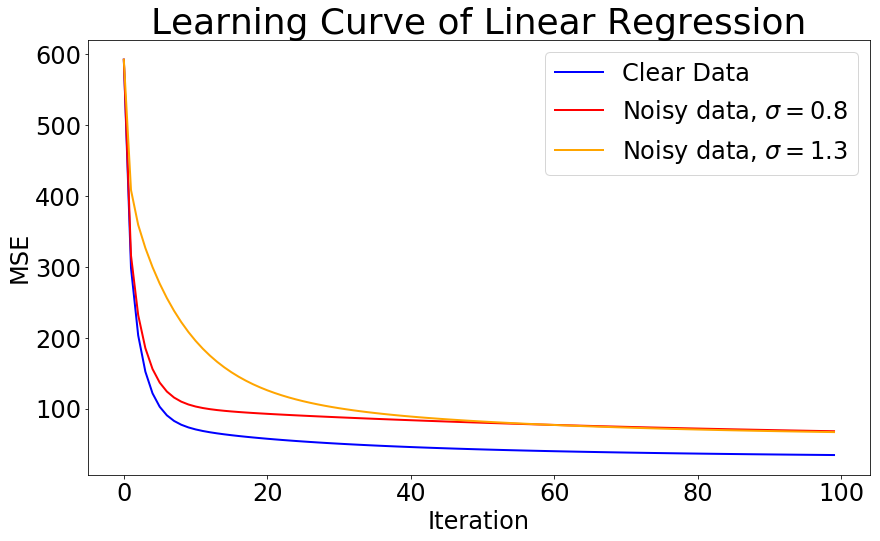

In [129]:
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.markersize'] = 12
plt.rcParams['xtick.labelsize'] = 24
plt.rcParams['ytick.labelsize'] = 24
plt.rcParams['legend.fontsize'] = 24
plt.rcParams['axes.titlesize'] = 36
plt.rcParams['axes.labelsize'] = 24
plt.figure(figsize=(14,8))

x_range = range(iters)
line_clear = plt.plot(x_range, losses, color='blue')
line_noisy_1 = plt.plot(x_range, losses_noisy_1, color='red')
line_noisy_2 = plt.plot(x_range, losses_noisy_2, color='orange')

plt.xlabel("Iteration")
plt.ylabel("MSE")
plt.title("Learning Curve of Linear Regression")
plt.legend(('Clear Data', 'Noisy data, $\sigma = 0.8$', 'Noisy data, $\sigma = 1.3$'))

plt.savefig('plot1.png')